# Time to position

Abhinav Madahar <abhinav.madahar@rutgers.edu>, James Abello Monedero <abelloj@cs.rutgers.edu>

---

It takes time to use force-directed layout to position the vertices in a graph.
Here, we find out how much time it takes.
First, let's load in a graph.

In [1]:
import networkx as nx

Now, we want to use force-directed layout in a single iteration and time it.

In [14]:
import random as R
import itertools

from time import time, sleep
from multiprocessing import Pool, cpu_count

durations = []
size = 1

n_iterations = 200

def time_to_position(size):
    start_time = time()
    G = nx.dense_gnm_random_graph(*size)
    nx.spring_layout(G, iterations=n_iterations)
    return (G.number_of_nodes(), G.number_of_edges(), time() - start_time)

with Pool(cpu_count()) as pool:
    sizes = []
    for _ in range(cpu_count() * 10):
        number_of_nodes = R.randint(100, 250)
        number_of_edges = R.randint(1000, number_of_nodes * (number_of_nodes-1) / 2)
        sizes.append((number_of_nodes, number_of_edges))
    times = pool.map(time_to_position, sizes)

Ok, we can now plot these durations.

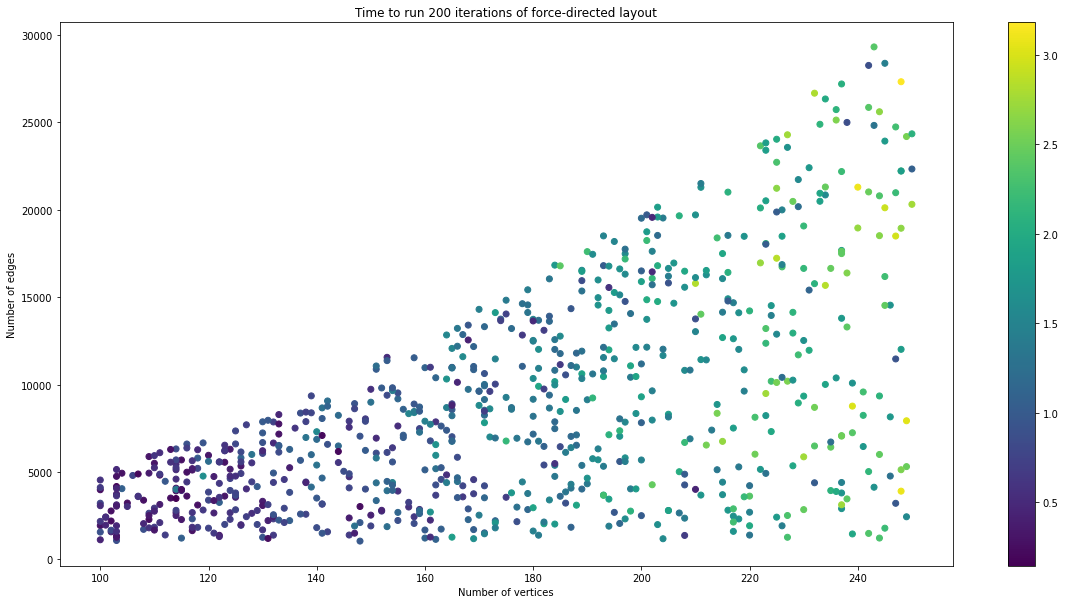

In [15]:
import matplotlib.pyplot as plt

x, y, c = list(zip(*times))

plt.figure(figsize=(20, 10))
plt.scatter(x, y, c=c)
plt.xlabel('Number of vertices')
plt.ylabel('Number of edges')
plt.title('Time to run %s iterations of force-directed layout'%n_iterations)
plt.colorbar();

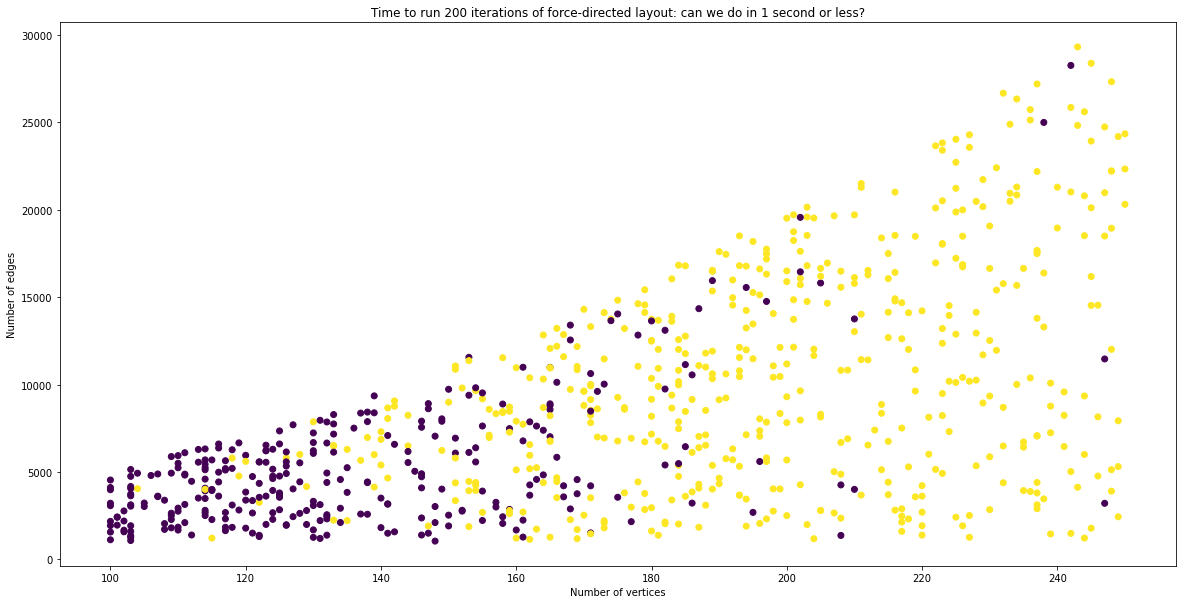

In [16]:
import matplotlib.pyplot as plt

x, y, c = list(zip(*times))

plt.figure(figsize=(20, 10))
plt.scatter(x, y, c=[time > 1 for time in c])
plt.xlabel('Number of vertices')
plt.ylabel('Number of edges')
plt.title('Time to run %s iterations of force-directed layout: can we do in 1 second or less?'%n_iterations);

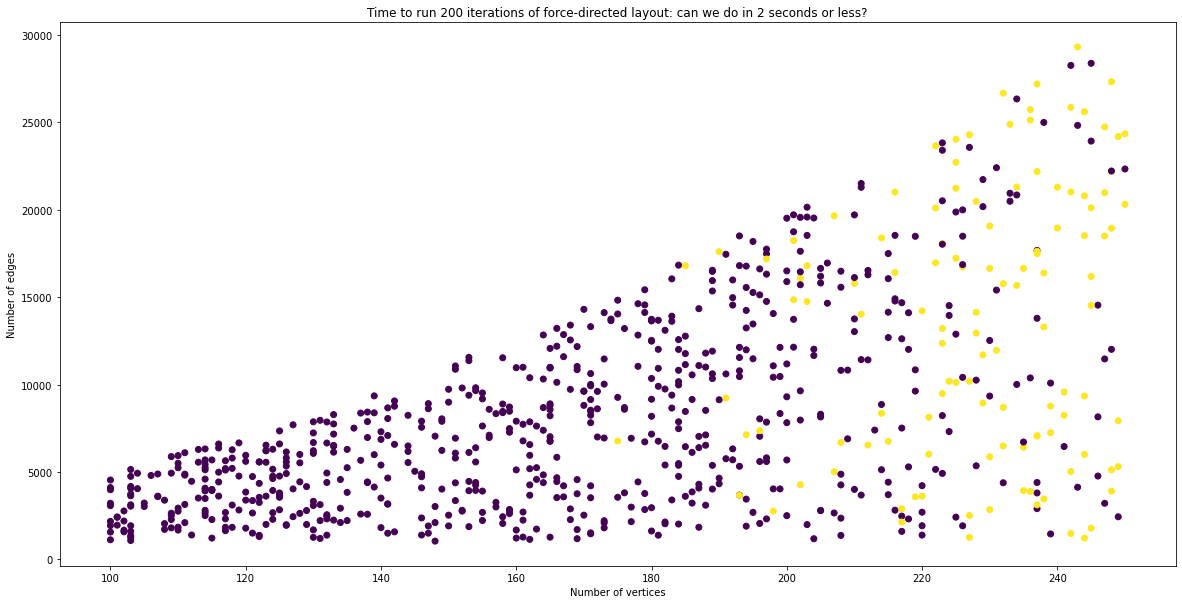

In [17]:
import matplotlib.pyplot as plt

x, y, c = list(zip(*times))

plt.figure(figsize=(20, 10))
plt.scatter(x, y, c=[time > 2 for time in c])
plt.xlabel('Number of vertices')
plt.ylabel('Number of edges')
plt.title('Time to run %s iterations of force-directed layout: can we do in 2 seconds or less?'%n_iterations);

What do these positions look like?

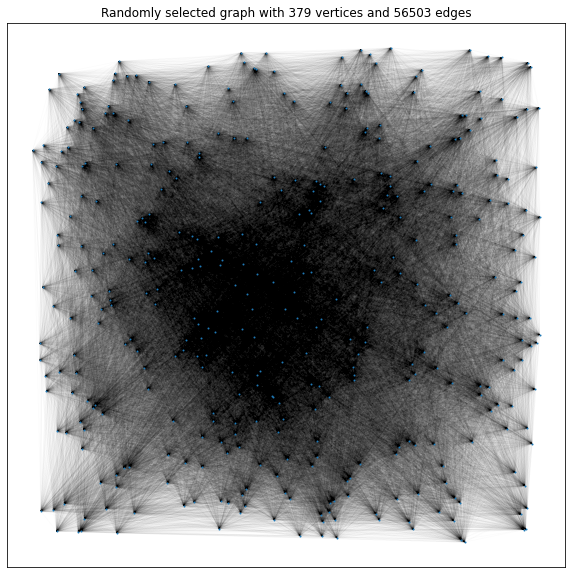

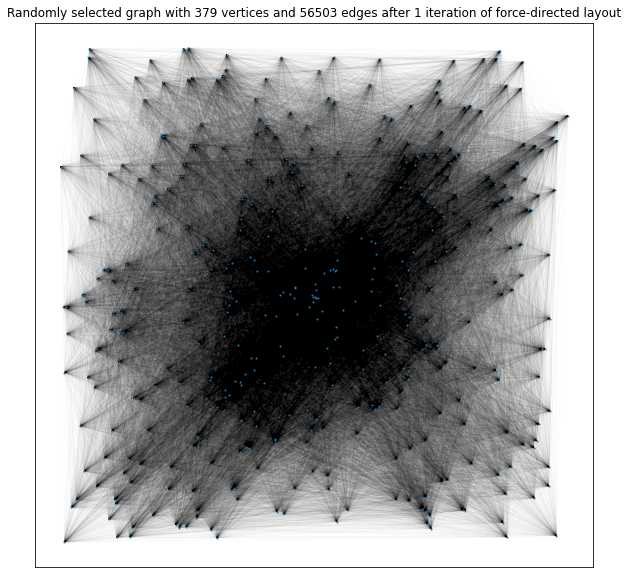

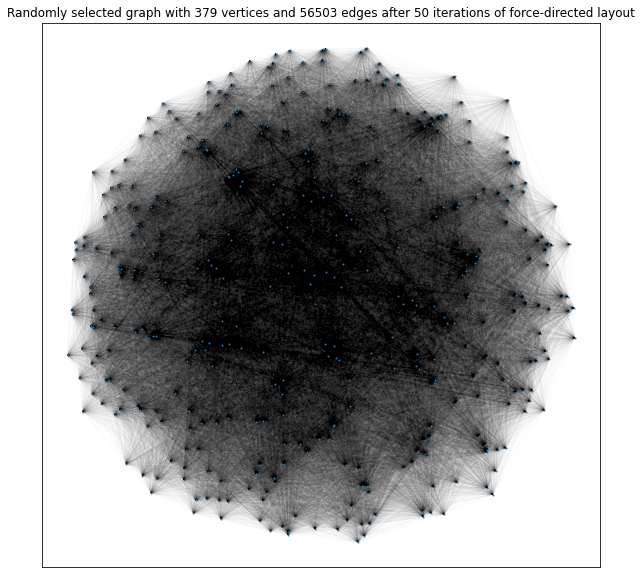

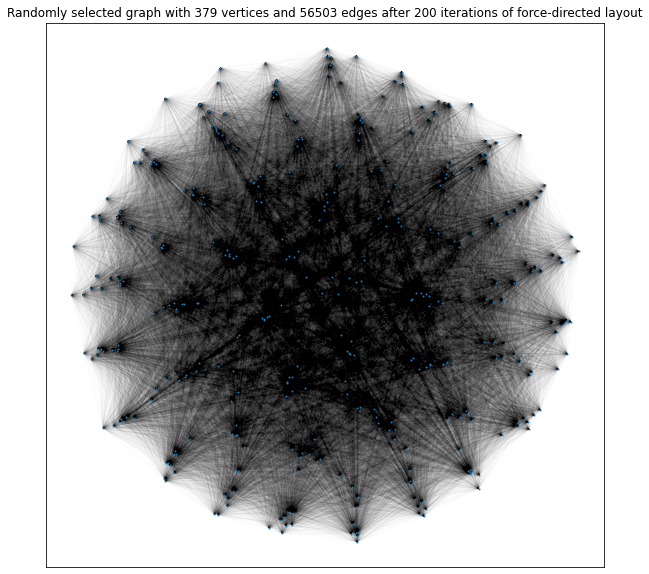

In [8]:
number_of_nodes = R.randint(100, 250)
number_of_edges = R.randint(1000, number_of_nodes * (number_of_nodes-1) / 2)
size = (number_of_nodes, number_of_edges)

G = nx.dense_gnm_random_graph(*size)
pos = nx.spring_layout(G, iterations=0)
plt.figure(figsize=(10, 10))
plt.title('Randomly selected graph with %s vertices and %s edges (random positioning)'%(number_of_nodes, number_of_edges))
nx.draw_networkx_nodes(G, pos=pos, node_size=1)
nx.draw_networkx_edges(G, pos=pos, node_size=1, alpha=0.01);
plt.show()

pos = nx.spring_layout(G, iterations=1)
plt.figure(figsize=(10, 10))
plt.title('Randomly selected graph with %s vertices and %s edges after 1 iteration of force-directed layout'%(number_of_nodes, number_of_edges))
nx.draw_networkx_nodes(G, pos=pos, node_size=1)
nx.draw_networkx_edges(G, pos=pos, node_size=1, alpha=0.01)
plt.show()

pos = nx.spring_layout(G, iterations=50)
plt.figure(figsize=(10, 10))
plt.title('Randomly selected graph with %s vertices and %s edges after 50 iterations of force-directed layout'%(number_of_nodes, number_of_edges))
nx.draw_networkx_nodes(G, pos=pos, node_size=1)
nx.draw_networkx_edges(G, pos=pos, node_size=1, alpha=0.01)

pos = nx.spring_layout(G, iterations=200)
plt.figure(figsize=(10, 10))
plt.title('Randomly selected graph with %s vertices and %s edges after 200 iterations of force-directed layout'%(number_of_nodes, number_of_edges))
nx.draw_networkx_nodes(G, pos=pos, node_size=1)
nx.draw_networkx_edges(G, pos=pos, node_size=1, alpha=0.01)